# Ranking


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn.objects as so

## Lollipop


In [2]:
mpg = pd.read_csv("data/mpg.csv")
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
mpg_group = (
    mpg.loc[:, ["cty", "manufacturer"]].groupby("manufacturer").agg({"cty": np.mean})
)
mpg_group.head()


,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444


In [4]:
mpg_group.sort_values("cty", inplace=True)
mpg_group.reset_index(inplace=True)
mpg_group.head()


,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


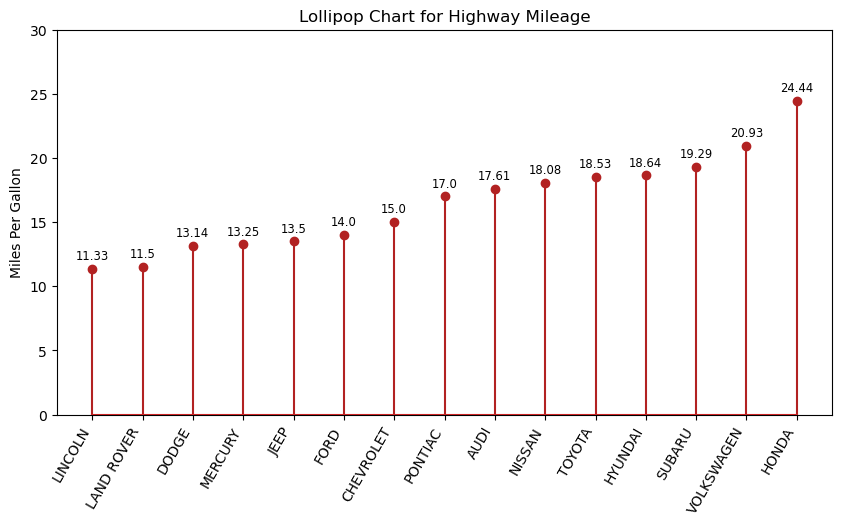

In [5]:
x = mpg_group["manufacturer"].str.upper()
y = mpg_group["cty"]

_, ax = plt.subplots(figsize=(10, 5))

markerline, stemlines, _ = ax.stem(x, y)
stemlines.set_color("firebrick")
markerline.set_markerfacecolor("firebrick")
markerline.set_markeredgecolor("firebrick")

ax.set(
    ylim=(0, 30), ylabel="Miles Per Gallon", title="Lollipop Chart for Highway Mileage"
)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment="right")

for row in mpg_group.itertuples():
    ax.text(
        row.Index,
        row.cty + 0.5,
        s=round(row.cty, 2),
        horizontalalignment="center",
        verticalalignment="bottom",
        fontsize="small",
    )

plt.show()


## Slope


In [6]:
gdp = pd.read_csv("data/gdp_per_cap.csv")
gdp.head()


,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [7]:
gdp_new = gdp.melt(
    id_vars=["continent"],
    value_vars=["1952", "1957"],
    var_name="time",
    value_name="total",
    ignore_index=False,
)
gdp_new["continent"] = gdp_new["continent"].astype("category")
gdp_new


,continent,time,total
0,Africa,1952,1252.572466
1,Americas,1952,4079.062552
2,Asia,1952,5195.484004
3,Europe,1952,5661.057435
4,Oceania,1952,10298.085650
0,Africa,1957,1385.236062
1,Americas,1957,4616.043733
2,Asia,1957,4003.132940
3,Europe,1957,6963.012816
4,Oceania,1957,11598.522455


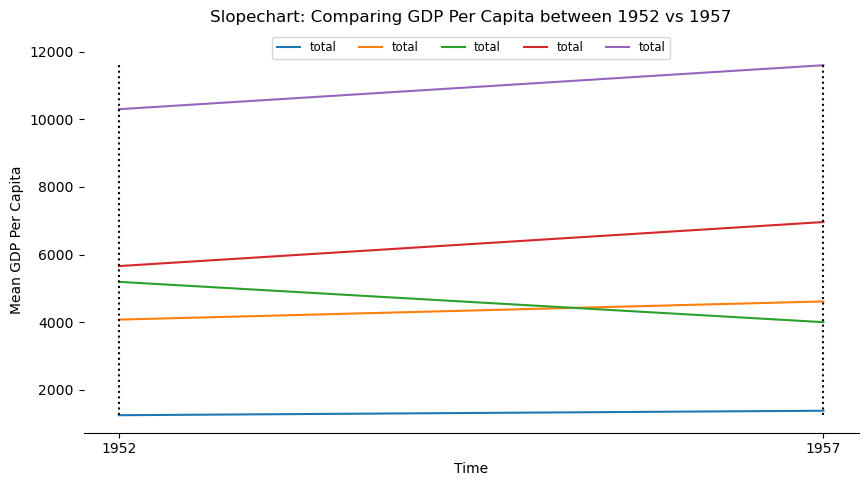

In [8]:
_, ax = plt.subplots(figsize=(10, 5))

gdp_new.groupby("continent").plot.line(x="time", y="total", ax=ax)

for i in [0, 1]:
    ax.vlines(
        x=i,
        ymin=gdp_new["total"].min(),
        ymax=gdp_new["total"].max(),
        colors="k",
        linestyle="dotted",
    )

ax.set(
    xlabel="Time",
    ylabel="Mean GDP Per Capita",
    title="Slopechart: Comparing GDP Per Capita between 1952 vs 1957\n",
    xticks=[0, 1],
    xticklabels=["1952", "1957"],
)

ax.spines[["right", "top", "left"]].set_visible(False)

ax.legend(
    loc="center",
    bbox_to_anchor=(0.5, 1),
    ncol=len(gdp_new["continent"].unique()),
    fontsize="small",
)
plt.show()


## Dumbbell


In [9]:
gapminder = pd.read_csv("data/gapminder.csv")
gapminder.head()


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [10]:
gapminder_group = (
    gapminder.groupby(["continent", "year"])
    .apply(lambda x: x.head(3))
    .reset_index(drop=True)
    .query("year in [1962, 2002]")
    .sort_values(["continent", "country"])
)
gapminder_group.head()


,country,continent,year,lifeExp,pop,gdpPercap
6,Algeria,Africa,1962,48.303,11000948,2550.816880
30,Algeria,Africa,2002,70.994,31287142,5288.040382
7,Angola,Africa,1962,34.000,4826015,4269.276742
31,Angola,Africa,2002,41.003,10866106,2773.287312
8,Benin,Africa,1962,42.618,2151895,949.499064


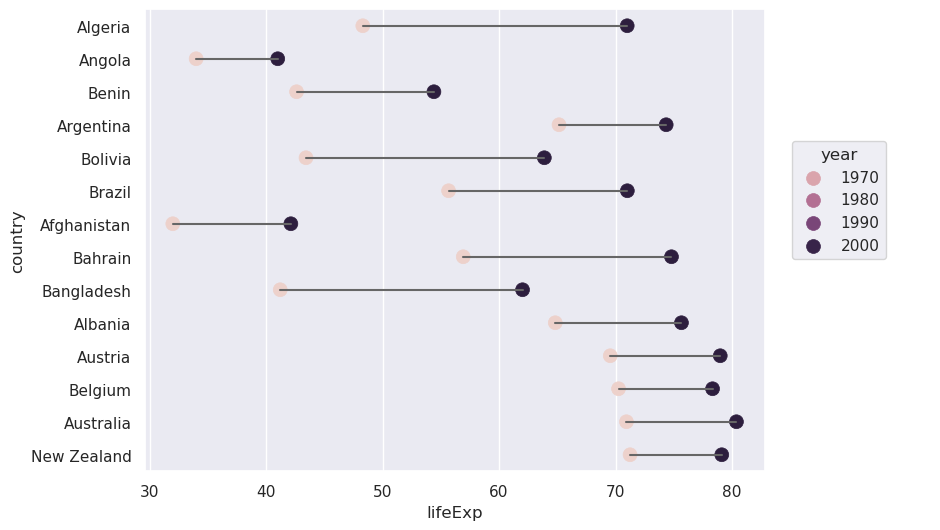

In [11]:
p = (
    so.Plot(gapminder_group, x="lifeExp", y="country")
    .on(f := plt.figure(figsize=(8, 6)))
    .add(so.Line(color=".4"), group="country")
    .add(so.Dot(pointsize=10), group="year", color="year")
    # .scale(color=["r", "n"])
).plot()
